variances of each feature [72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]
        PC1       PC2  Y
0 -2.264703 -0.480027  1
1 -2.080961  0.674134  1
2 -2.364229  0.341908  1
3 -2.299384  0.597395  1
4 -2.389842 -0.646835  1


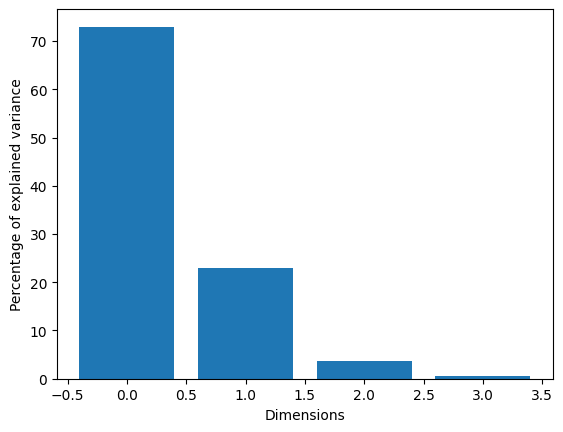

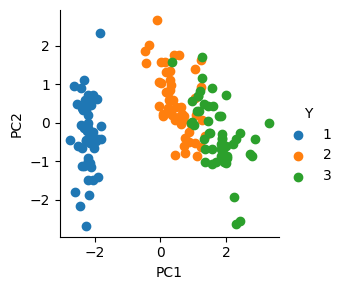

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('iris.csv')
df.head()

X = df.drop(['species'],axis=1)
y=df['species']

X = StandardScaler().fit_transform(X)

# features = X.T
cov_matrix = np.cov(X.T)
values, vectors = np.linalg.eig(cov_matrix)

var = []
for i in range(len(values)):
    var.append((values[i] / np.sum(values))*100)

print("variances of each feature",var)

plt.bar(range(4),var)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

projected_1 = X.dot(vectors.T[0])
projected_2 = X.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
print(res.head())

sns.FacetGrid(res, hue="Y").map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()